<a href="https://colab.research.google.com/github/haituly/haituly.github.io/blob/main/Apply%20Math%20to%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
def reflectMult(A,w):
  W=2*np.outer(w,w)/(np.linalg.norm(w)**2)
  I=np.eye(len(w))
  Q=I-W
  A[:,:]=Q@A

for i in range(50):
  A=np.random.rand(100,50)
  B=np.copy(A)
  reflectMult(B,np.eye(100)[:,i]-B[:,i]/np.linalg.norm(B[:,i]))
  print(np.allclose(B[:,i],np.eye(100)[:,i]*np.linalg.norm(A[:,i])))
  print(np.allclose(np.linalg.norm(B),np.linalg.norm(A)))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [3]:
import numpy as np
def assembleQ(q):
  m,n=q.shape
  Q=np.eye(m)
  for i in range(n):
    reflectMult(Q,q[:,n-1-i])
  return Q

def sgn(x):
  if x == 0:
    return 1
  else:
    return np.sign(x)

def myQR(A):
  m,n=A.shape
  q=np.zeros((m,n))
  R=np.copy(A)
  for i in range(n):
    q[i:,i]=R[i:,i]
    q[i,i] += sgn(q[i,i])*np.linalg.norm(q[i:,i])
    reflectMult(R[i:,i:],q[i:,i])
  return q, R[:n,:n]

def reflectMult(A,w):
  W=2*np.outer(w,w)/(np.linalg.norm(w)**2)
  I=np.eye(len(w))
  Q=I-W
  A[:,:]=Q@A


A=np.random.rand(100,50)
q,R=myQR(A)
Q=assembleQ(q)
np.allclose(Q[:,:50]@R,A)


True

In [4]:
import numpy as np
def assembleQ(q):
  m,n=q.shape
  Q=np.eye(m)
  for i in range(n):
    reflectMult(Q,q[:,n-1-i])
  return Q

def myLS(A,b):
  q,R=myQR(A)
  Q=assembleQ(q)
  p=(Q.transpose())@b
  return upperbSub(R,p)

def myQR(A):
  m,n=A.shape
  q=np.zeros((m,n))
  R=np.copy(A)
  for i in range(n):
    q[i:,i]=R[i:,i]
    q[i,i] += sgn(q[i,i])*np.linalg.norm(q[i:,i])
    reflectMult(R[i:,i:],q[i:,i])
  return q, R[:n,:n]

def upperbSub(A,b):
  n=len(A)
  x=np.zeros(n)
  x[n-1]=b[n-1]/A[n-1,n-1]
  for i in range(1,len(A)):
    x[n-1-i]=1/A[n-1-i,n-1-i]*(b[n-1-i]-np.dot(A[n-1-i,n-i:],x[n-i:]))
  return x

A=np.random.rand(100,50)
b=np.random.rand(100)
x=myLS(A,b)
np.allclose(x,np.linalg.lstsq(A,b,rcond=None)[0])

True

In [10]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [11]:
cd gdrive/MyDrive/Regression

/content/gdrive/MyDrive/Regression


In [12]:
ls

life_test.csv  life_train.csv


In [13]:
import pandas as pd
from matplotlib import pyplot as plt
df_train=pd.read_csv("life_train.csv")
df_test=pd.read_csv("life_test.csv")

In [11]:
df_train

,Country,Year,Life expectancy,Alcohol,percentage expenditure,BMI,Total expenditure,GDP,Income composition of resources,Schooling
0,Croatia,2013,77.7,12.39,1899.107385,62.5,7.83,13574.749000,0.817,14.9
1,Ethiopia,2007,58.5,1.06,30.464518,14.5,4.69,243.326822,0.362,7.1
2,Ukraine,2002,67.6,4.89,115.738974,55.4,6.25,879.475486,0.683,13.9
3,Mali,2008,55.5,0.57,102.141374,19.6,6.74,689.678423,0.360,5.8
4,Ukraine,2000,67.5,4.49,7.883791,54.8,5.59,635.789635,0.669,13.3
...,...,...,...,...,...,...,...,...,...,...
1255,Bhutan,2003,63.3,0.52,19.156641,15.5,4.90,997.741714,0.000,8.4
1256,Kenya,2004,53.0,1.43,36.297752,15.9,4.29,458.884355,0.461,8.9
1257,Mauritius,2006,71.8,3.73,502.384495,28.6,4.38,5695.969327,0.713,13.4
1258,Lebanon,2006,74.1,1.82,534.579570,61.4,8.83,5372.658990,0.733,13.2


array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Life expectancy ', ylabel='Year'>,
        <AxesSubplot:xlabel='Alcohol', ylabel='Year'>,
        <AxesSubplot:xlabel='percentage expenditure', ylabel='Year'>,
        <AxesSubplot:xlabel=' BMI ', ylabel='Year'>,
        <AxesSubplot:xlabel='Total expenditure', ylabel='Year'>,
        <AxesSubplot:xlabel='GDP', ylabel='Year'>,
        <AxesSubplot:xlabel='Income composition of resources', ylabel='Year'>,
        <AxesSubplot:xlabel='Schooling', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='Life expectancy '>,
        <AxesSubplot:xlabel='Life expectancy ', ylabel='Life expectancy '>,
        <AxesSubplot:xlabel='Alcohol', ylabel='Life expectancy '>,
        <AxesSubplot:xlabel='percentage expenditure', ylabel='Life expectancy '>,
        <AxesSubplot:xlabel=' BMI ', ylabel='Life expectancy '>,
        <AxesSubplot:xlabel='Total expenditure', ylabel='Life expectancy '>,
        <AxesSubplot:x

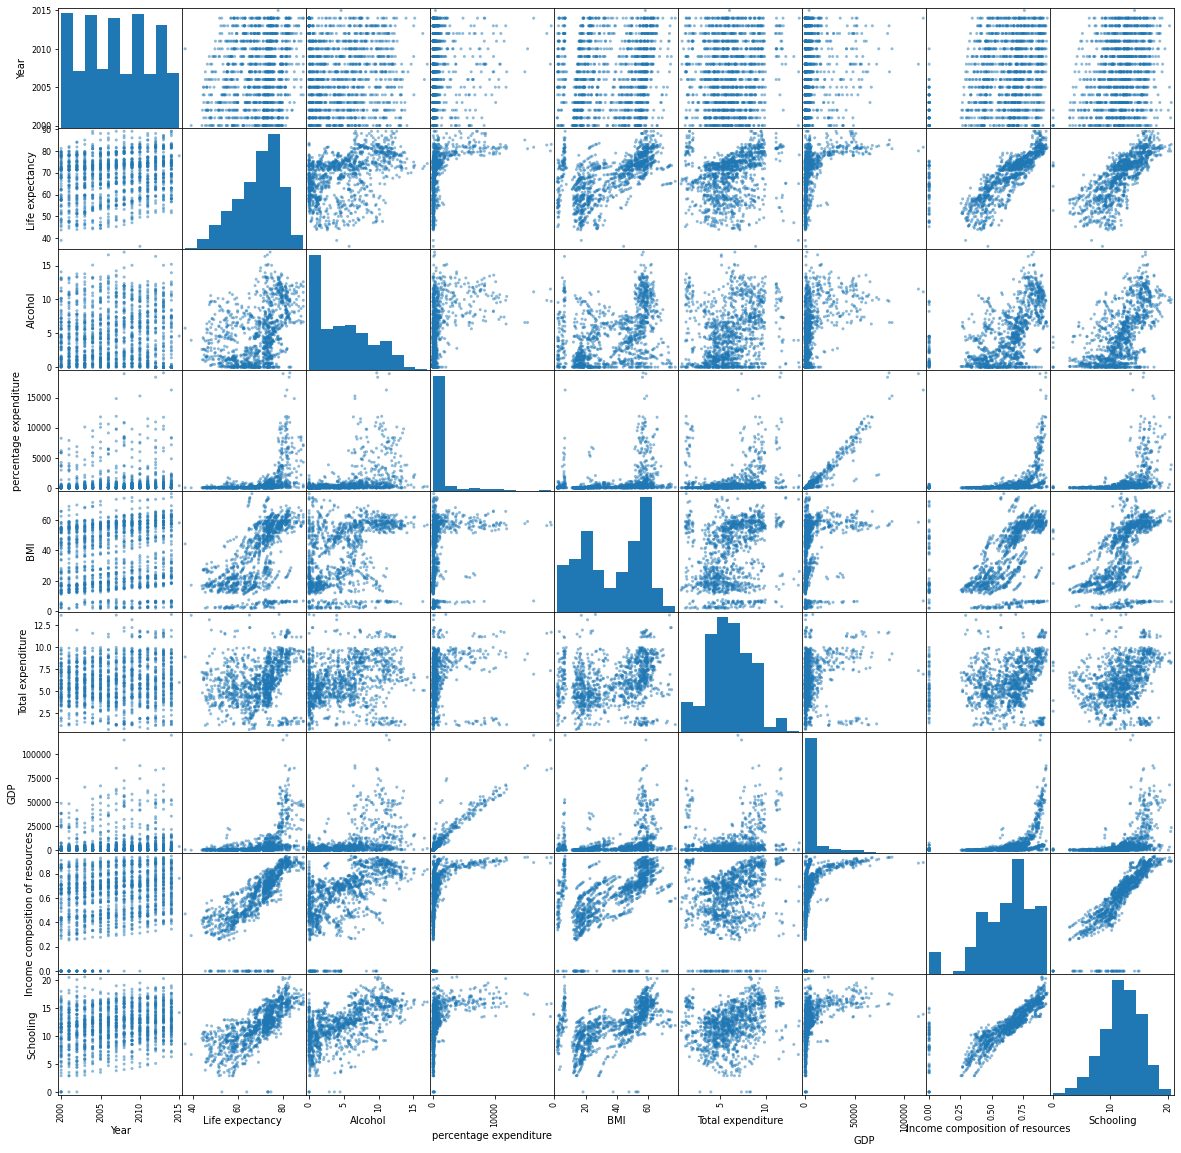

In [39]:
pd.plotting.scatter_matrix(df_train,figsize=(20,20))

In [14]:
X_train=np.zeros((df_train.shape[0],8))
X_train[:,7]=1
X_train[:,:7]=df_train.iloc[:,3:10].to_numpy()
Y_train=df_train.iloc[:,2].to_numpy()
df_test.shape
X_test=np.zeros((df_test.shape[0],8))
X_test[:,7]=1
X_test[:,:7]=df_test.iloc[:,3:10].to_numpy()
Y_test=df_test.iloc[:,2].to_numpy()

In [15]:
weights=myLS(X_train,Y_train)

In [16]:
def predict(x):
  return np.dot(weights,x)

In [17]:
df_test

,Country,Year,Life expectancy,Alcohol,percentage expenditure,BMI,Total expenditure,GDP,Income composition of resources,Schooling
0,Iraq,2014,67.9,0.01,43.524080,58.5,5.54,673.747370,0.658,10.1
1,Equatorial Guinea,2003,53.8,7.13,309.783459,19.5,2.23,3577.176197,0.554,8.4
2,El Salvador,2009,71.4,2.55,416.433840,52.1,6.83,3366.482133,0.662,12.8
3,Namibia,2001,56.5,5.09,205.807883,25.1,6.18,1834.294860,0.556,11.7
4,Solomon Islands,2000,65.8,0.71,4.249261,37.9,4.56,154.518572,0.455,7.2
...,...,...,...,...,...,...,...,...,...,...
836,Philippines,2001,66.8,4.54,69.020425,18.3,3.00,957.287441,0.622,11.4
837,Sao Tome and Principe,2006,64.7,5.46,47.089311,24.0,7.84,843.894470,0.521,10.2
838,Azerbaijan,2013,72.2,2.14,275.651493,5.6,5.54,7875.756953,0.745,11.9
839,Belize,2005,69.0,6.25,365.799896,43.8,4.45,3933.332215,0.695,12.8


In [23]:
predict(X_test[785])

81.23948201277952

In [27]:
predict(X_test[836])

65.71775376807915

In [28]:
predict(X_test[702])

81.8941112488582

In [ ]:
print("The predict is close to the true value (82.1) for the average life-expectancy in Spain from 2011")

The predict is close to the true value (82.1) for the average life-expectancy in Spain from 2011


In [29]:
predict(X_test[383])

59.5504103713391

In [30]:
print("The predict is close to the true value (59.3) for the average life-expectancy in Cambodia from 2002")

The predict is close to the true value (59.3) for the average life-expectancy in Cambodia from 2002


In [ ]:
predict(X_test[186])

74.61174679928229

In [ ]:
print("The predict is off 10 points to the true value (83.5) for the average life-expectancy in Japan from 2013")

The predict is off 10 points to the true value (83.5) for the average life-expectancy in Japan from 2013


In [35]:
errors=np.zeros(X_test.shape[0])
for i in range(X_test.shape[0]):
  errors[i]=Y_test[i]-predict(X_test[i,:])
print(np.average(errors))
print(np.average(np.abs(errors)))
print(np.std(errors))

-0.38027661609104135
4.3217908586933875
5.733845434704198


(array([ 1.,  0.,  1.,  0.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  5.,  4.,
         1.,  1.,  2.,  1.,  2.,  1.,  5.,  6.,  0.,  2.,  8.,  6.,  3.,
         7.,  7., 11., 13., 14., 12., 16., 13., 13., 15., 15., 16., 17.,
        25., 31., 27., 38., 34., 21., 28., 23., 41., 29., 40., 34., 22.,
        33., 24., 18., 16., 24., 14., 12.,  9., 14.,  5.,  6.,  6.,  9.,
         4.,  1.,  5.,  4.,  0.,  1.,  1.,  2.,  1.,  0.,  0.,  1.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-20.33219829, -19.87955388, -19.42690947, -18.97426506,
        -18.52162065, -18.06897624, -17.61633182, -17.16368741,
        -16.711043  , -16.25839859, -15.80575418, -15.35310977,
        -14.90046536, -14.44782095, -13.99517654, -13.54253213,
        -13.08988772, -12.63724331, -12.1845989 , -11.73195449,
        -11.27931008, -10.82666567, -10.37402126,  -9.92137685,
         -9.46873244,  -9.01608803,  -8.56344361, 

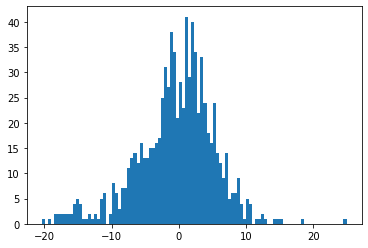

In [38]:
plt.hist(errors,bins=100)

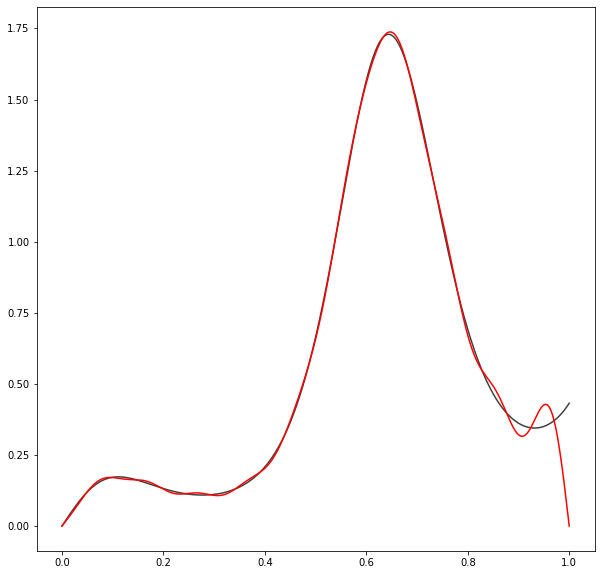

In [37]:
import numpy as np
def encoderMatrix(samples,size):
  x=np.linspace(0,1,samples)
  A=np.zeros((samples,size))
  for i in range(size):
    A[:,i]=np.sin((i+1)*np.pi*x)
  return x, A
x, A=encoderMatrix(1000,20)
f=x*np.exp(np.cos(10*x))
z=myLS(A,f)
plt.figure(figsize=(10, 10))
plt.plot(x,f,"k",alpha=.75)
plt.plot(x,A@z,"r")

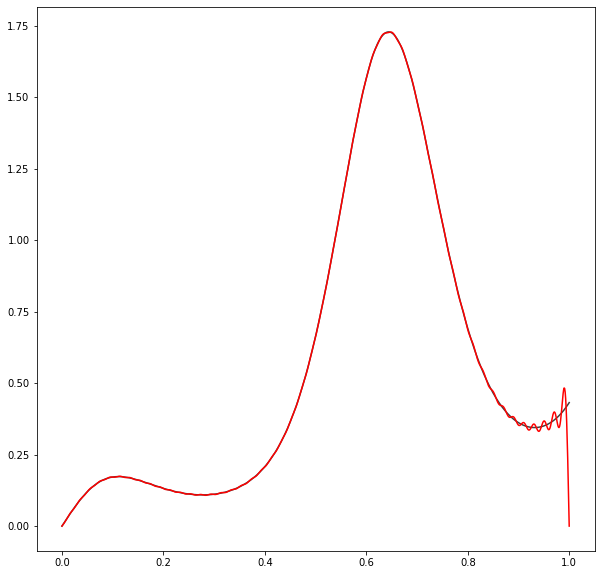

In [ ]:
import numpy as np
def encoderMatrix(samples,size):
  x=np.linspace(0,1,samples)
  A=np.zeros((samples,size))
  for i in range(size):
    A[:,i]=np.sin((i+1)*np.pi*x)
  return x, A
x, A=encoderMatrix(1000,100)
f=x*np.exp(np.cos(10*x))
z=myLS(A,f)
plt.figure(figsize=(10, 10))
plt.plot(x,f,"k",alpha=.75)
plt.plot(x,A@z,"r")

In [ ]:
print("The different is that at the right end point with 100 basis fuction. The approximate is getting close and close to the origin which is good for approximation or least square error")

The different is that at the right end point with 100 basis fuction. The approximate is getting close and close to the origin which is good for approximation or least square error


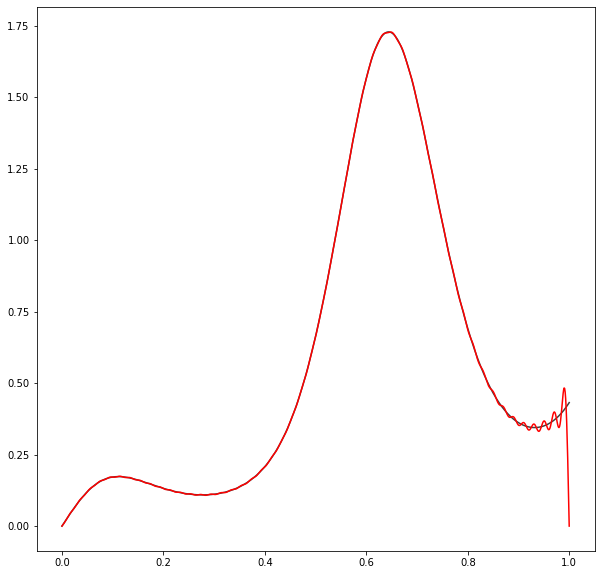

In [ ]:
import numpy as np
x, A=encoderMatrix(1000,100)
f=x*np.exp(np.cos(10*x))
z=myLS(A,f)
plt.figure(figsize=(10, 10))
plt.plot(x,f,"k",alpha=.75)
plt.plot(x,A@z,"r")

def encoderMatrix(samples,size):
  x=np.linspace(0,1,samples)
  A=np.zeros((samples,size))
  for i in range(size):
    A[:,i]=np.sin((i+1)*x)
  return x, A

In [ ]:
print("It does not have any differences with the modified encoder but the modified encoder is better becasue its more effeciency.")

It does not have any differences with the modified encoder but the modified encoder is better becasue its more effeciency.
